**Please acknowledge the source of this dataset as being from Vanderbilt University Department of Biostatistics, Professor Frank Harrell 2022, url: https://hbiostat.org/data/**

## This is a dataset of a controlled trial conducted to improve care for seriously ill hospitalized patients. The study to understand prognoses and preferences for outcomes and risks of treatments (SUPPORT).

**Objectives**: To improve end-of-life decision making and reduce the frequency of a mechanically supported, painful, and prolonged process of dying.

**Design**: A 2-year prospective observational study (phase I) with 4301 patients followed by a 2-year controlled clinical trial (phase II) with 4804 patients and their physicians randomized by specialty group to the intervention group (n = 2652) or control group (n = 2152).

**Patients**: A total of 9105 adults hospitalized with one or more of nine life-threatening diagnoses; an overall 6-month mortality rate of 47%.

More details here - https://pubmed.ncbi.nlm.nih.gov/7474243/

**Information regarding tasks for education purposes:**


According to the HBiostat Repository (https://hbiostat.org/data/repo/supportdesc, Professor Frank Harrell) the following tasks have been found to be useful for education purposes: <br>
- Binary classification: <br>
  Hospital Death

- Classification: <br>
The functional disability of the patient (variable sfdm2) on a 5 points scale (with 5 being the most severely disabled), was measured 2 months after study entry through patient or surrogate interviews. It uses the Sickness Impact Profile (SIP), a behavioral-based measure of health status. The variable has 5 levels mapped as follows: <br>
1. No signs of moderate to severe functional disability from the interview
2. Patient was unable to do 4 or more activities of daily living
3. Sickness Impact Profile total score at 2 months is greater or equal to 30
4. Patient intubated or in coma
5. Patient died before 2 months after study entry

For more detailed on the used scale, refer to https://www.sciencedirect.com/science/article/pii/089543569090224D?via%3Dihub

- Regression: <br>
Can predict the total hospital costs per patient <br>
Can predict the length of stay for the patients <br>

**Dataset Characteristics:** Tabular, Multivariate <br>
**Feature Type:** Categorical, Integer, Binary <br>
**Subject Area:** Health and Medicine <br>
**Number of Instances:** 9105<br>
**Associated Tasks:** 
Classification, Regressio <br>
**Number of Columns:** 48 (predictors and targets) <br>

For additional information that was used for educating myself about this dataset, hospital management and understanding the problem, please refer to this page - https://archive.ics.uci.edu/dataset/880/support2

##### I am going to work on a few tasks in this project - multiclass classification, binary classification and regression. I want to predict functional disability of a patient based on provided test results, family interviews and other predictors. Then I will try to predict death in hospital based on some of these predictors plus physician 2-moth / 6 month survival estimate. And as the last step - hospital cost.

##### I am starting with exploring and cleaning the dataset.

###### Importing packages

In [1]:
import matplotlib.pyplot as mp
import pandas as pd 
import numpy as np
import seaborn as sb

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone 
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

###### Importing Data with Python - this code was provided by the Vanderbilt University Department of Biostatistics

In [5]:
#!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 
  
# metadata 
#print(support2.metadata) 
  
# variable information 
#print(support2.variables) 


In [7]:
# This will display all columns
pd.set_option('display.max_columns', None)

###### Dataset preview

In [8]:
data = pd.merge(X,y, left_index=True, right_index=True)
data.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,NaN,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,NaN,NaN,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,NaN,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.0,0,0,no(M2 and SIP pres)


###### Variables Description:

In [9]:
support2.variables

,name,role,type,demographic,description,units,missing_values
0,id,ID,Integer,None,None,None,no
1,age,Feature,Continuous,Age,Age of the patients in years,years,no
2,death,Target,Continuous,None,Death at any time up to National Death Index (...,None,no
3,sex,Feature,Categorical,Sex,Gender of the patient. Listed values are {male...,None,no
4,hospdead,Target,Binary,None,Death in hospital,None,no
5,slos,Other,Continuous,None,Days from Study Entry to Discharge,None,no
6,d.time,Other,Continuous,None,Days of follow-up,None,no
7,dzgroup,Feature,Categorical,None,The patient's disease sub category amogst ARF/...,None,no
8,dzclass,Feature,Categorical,None,"The patient's disease category amongst ""ARF/MO...",None,no
9,num.co,Feature,Continuous,None,The number of simultaneous diseases (or comorb...,None,no


##### Surprisingly, the datasets imported from the repository provided above is missing a few variables - see the columns list below and compare with the variables description above (45 vs 48). _slos_, _hday_ and _d.time_ are missing. They are very important data attributes that are used as predictors and then targets, depending on the stage of this project.

In [10]:
data.columns

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma',
       'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m',
       'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
       'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine',
       'adlp', 'adls', 'adlsc', 'death', 'hospdead', 'sfdm2'],
      dtype='object')

##### After doing more research I found this dataset in a csv format on this page - https://hbiostat.org/data/ <br>
##### Fortunately, all 48 columns are present in this file, so I used it instead.

In [11]:
# Importing downloaded csv file
data_read = pd.read_csv(r'C:\Users\irent\Downloads\ML\support2.csv')

###### General information - missing values, variables type

In [12]:
data_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

#### Count of Patients by Disease

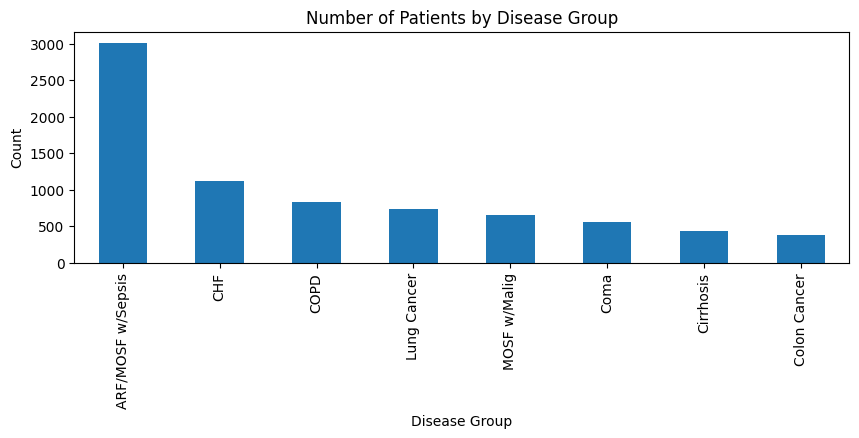

In [122]:
ax = data_read['dzgroup'].value_counts().plot(kind='bar',
                                    figsize=(10,3),
                                    title="Number of Patients by Disease Group")
ax.set_xlabel("Disease Group")
ax.set_ylabel("Count")
plt.show()

In [13]:
# Exploring statistics of the dataset
data_read.describe()

,id,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,9104.000000,9104.000000,9105.000000,9105.000000,9105.000000,7456.000000,7472.000000,9075.000000,9104.000000,8893.000000,9104.000000,9104.000000,9104.000000,6780.000000,5733.000000,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,4553.000000,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,0.635870,0.520096,4.400000,0.195277,0.032510,0.618769,0.499679,14.582590,84.546408,12.347677,97.156711,23.330294,37.103341,239.529070,2.950520,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,2628.531434,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,0.248175,0.253343,9.126811,0.396436,0.177359,0.298367,0.304367,19.944216,27.687692,9.266329,31.559292,9.573801,1.251796,109.665593,0.875944,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,1.000000,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2277.000000,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,0.507690,0.342957,1.000000,0.000000,0.000000,0.500000,0.200000,4.000000,63.000000,7.000000,72.000000,18.000000,36.195310,155.093750,2.399902,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,4553.000000,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,0.715942,0.574951,1.000000,0.000000,0.000000,0.700000,0.500000,9.000000,77.000000,10.599609,100.000000,24.000000,36.695310,224.000000,2.899902,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,6829.000000,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,0.825928,0.725952,3.000000,0.000000,0.000000,0.900000,0.750000,17.000000,107.000000,15.298828,120.000000,28.000000,38.195310,304.750000,3.599609,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,9105.000000,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,0.969971,0.947998,148.000000,1.000000,1.000000,1.000000,1.000000,285.000000,195.000000,200.000000,300.000000,90.000000,41.695310,890.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


##### There are some features with outliers, which I am exploring below while cleaning and imputing data

### Missing Values

##### 1) There a few variables with missing values that can be imputed. <br>


According to the HBiostat Repository (https://hbiostat.org/data/repo/supportdesc, Professor Frank Harrell) the following default values have been found to be useful in imputing missing baseline physiologic data:
Baseline Variable	Normal Fill-in Valu
.- 
- PaO2/FiO2 ratio (pafi) 	333.3
- Bilirubin (bili)	1.01
- Creatinine (crea)	1.01
- bun	6.51
- White blood count (wblc)	9 (thousands)
- Urine output (uri
- Serum albumin (alb)	3.5ne)	2502

- dnr (do-not-resuscitate) order: I thought it would make sense that missing record equals no order

- totcst: total cost per person missing values, while charges are present. Per my calculation, the average ratio of cost to charges is 0.51, hense I derived those values from charges and imputed it. In addition to missing values, there were zero values as well, which I also replaced with derived values 

##### 2) There are 10 variables with only one missing value, and after exploring those I found that those are two records, so I am deleting two rows. 

In [14]:
# Copying df
impute_data = data_read

##### Some stats on imputing data

In [15]:
test = impute_data.loc[:,['alb', 'pafi','bili','crea','bun','wblc','urine']]

In [16]:
test.describe()

,alb,pafi,bili,crea,bun,wblc,urine
count,5733.000000,6780.000000,6504.000000,9038.000000,4753.000000,8893.000000,4243.000000
mean,2.950520,239.529070,2.554463,1.770961,32.349463,12.347677,2191.546047
std,0.875944,109.665593,5.318448,1.686041,26.792288,9.266329,1455.245777
min,0.399963,12.000000,0.099991,0.099991,1.000000,0.000000,0.000000
25%,2.399902,155.093750,0.500000,0.899902,14.000000,7.000000,1165.500000
50%,2.899902,224.000000,0.899902,1.199951,23.000000,10.599609,1968.000000
75%,3.599609,304.750000,1.899902,1.899902,42.000000,15.298828,3000.000000
max,29.000000,890.375000,63.000000,21.500000,300.000000,200.000000,9000.000000


Text(0.5, 1.0, 'urine')

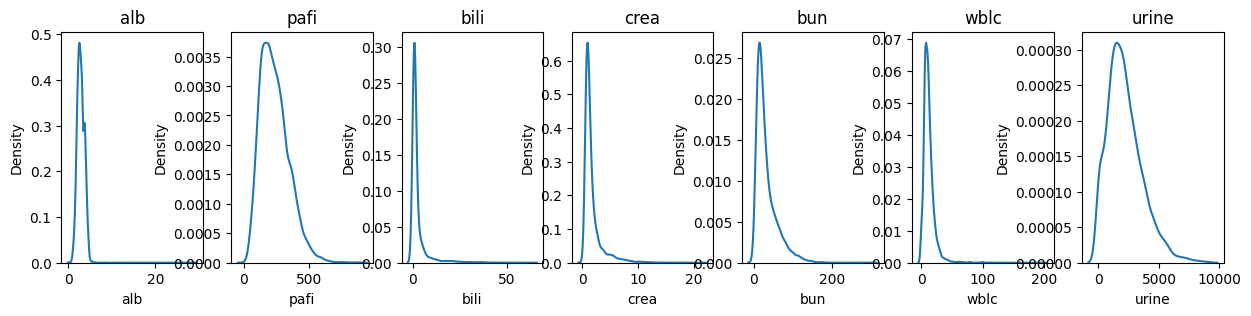

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 3))
sb.kdeplot(test['alb'], ax=axes[0], label='alb')
axes[0].set_title('alb')
sb.kdeplot(test['pafi'], ax=axes[1], label='pafi')
axes[1].set_title('pafi')
sb.kdeplot(test['bili'], ax=axes[2], label='bili')
axes[2].set_title('bili')
sb.kdeplot(test['crea'], ax=axes[3], label='crea')
axes[3].set_title('crea')
sb.kdeplot(test['bun'], ax=axes[4], label='bun')
axes[4].set_title('bun')
sb.kdeplot(test['wblc'], ax=axes[5], label='wblc')
axes[5].set_title('wblc')
sb.kdeplot(test['urine'], ax=axes[6], label='urine')
axes[6].set_title('urine')

##### They all have right skewness, and the tail is pretty long

##### I have done some research on the highest ever recorded level of these blood tests results and found that almost all of them can get near that level, except for _albumine_, _bun_ and _wblc_. So, I had some doubts, but was not sure that I can just drop it, as these are criticaly ill patients. Hence, I would consult with subject matter experts in this area. <br>
##### See some test results above 75 percentile below

In [18]:
# only one record of 200, so significant difference between 200 and adjective
test[test['wblc']>100]

,alb,pafi,bili,crea,bun,wblc,urine
1331,NaN,100.0,NaN,3.500000,73.0,112.18750,0.0
1381,NaN,165.0,NaN,2.000000,25.0,110.00000,2380.0
2909,NaN,NaN,NaN,0.500000,23.0,117.00000,930.0
5407,2.500000,242.5,2.299805,2.399902,44.0,128.78125,260.0
7356,NaN,NaN,NaN,2.000000,39.0,113.59375,1650.0
7526,3.199707,NaN,0.899902,1.199951,9.0,200.00000,4600.0
7564,2.199707,105.0,2.399902,2.899902,70.0,104.00000,1113.0


In [19]:
# 50 is the highest ever recorded, but we see quite a few record above that
test[test['bili']>50]

,alb,pafi,bili,crea,bun,wblc,urine
334,4.500000,NaN,54.296875,5.699219,NaN,21.699219,NaN
450,3.599609,160.00000,51.296875,5.000000,NaN,3.599609,NaN
967,NaN,178.00000,50.093750,3.199707,65.0,NaN,1200.0
1183,NaN,NaN,54.796875,4.599609,78.0,14.298828,0.0
1727,2.899902,NaN,50.695312,5.000000,NaN,15.000000,NaN
3389,2.500000,344.43750,50.195312,2.099609,NaN,24.296875,NaN
6161,3.699707,127.26562,63.000000,5.599609,NaN,14.099609,NaN


In [20]:
# again, big difference between 300 and adjective
test[test['bun']>150]

,alb,pafi,bili,crea,bun,wblc,urine
1333,3.199707,345.68750,2.399902,4.500000,166.0,35.695312,5435.0
1524,4.099609,342.50000,15.398438,4.399414,170.0,38.593750,0.0
2648,3.599609,342.81250,1.099854,13.099609,178.0,11.599609,241.0
2993,2.500000,NaN,NaN,5.099609,300.0,30.097656,2155.0
3117,NaN,355.00000,0.699951,21.500000,174.0,7.599609,625.0
5118,2.500000,293.31250,0.799927,1.699951,192.0,24.500000,NaN
6863,1.799805,77.54688,0.699951,4.799805,158.0,28.796875,1430.0
7126,2.899902,325.68750,0.899902,12.000000,154.0,22.898438,0.0
7186,2.199707,174.28125,1.599854,3.199707,158.0,15.199219,400.0
7401,3.899902,390.43750,0.799927,1.599854,171.0,7.099609,NaN


##### Moving to the next step - imputing data as described above

In [21]:
impute_data['dnr'].unique()

array(['no dnr', nan, 'dnr after sadm', 'dnr before sadm'], dtype=object)

In [22]:
impute_data['alb'] = impute_data['alb'].fillna(3.5)
impute_data['pafi'] = impute_data['pafi'].fillna(333.3)
impute_data['bili'] = impute_data['bili'].fillna(1.01)
impute_data['crea'] = impute_data['crea'].fillna(1.01)
impute_data['bun'] = impute_data['bun'].fillna(6.51)
impute_data['pafi'] = impute_data['pafi'].fillna(333.3)
impute_data['wblc'] = impute_data['wblc'].fillna(9)
impute_data['urine'] = impute_data['urine'].fillna(2502)
impute_data['dnr'] = impute_data['dnr'].fillna('no dnr')
impute_data.loc[impute_data['totcst']==0, 'totcst'] = impute_data.loc[impute_data['totcst']==0, 'charges']*0.51

##### Just one more stats check

In [23]:
test2 = impute_data.loc[:,['alb', 'pafi','bili','crea','bun','wblc','urine','totcst']]

In [24]:
test2.describe()

,alb,pafi,bili,crea,bun,wblc,urine,totcst
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,8217.000000
mean,3.154017,263.473871,2.113261,1.765361,19.998739,12.269730,2357.326071,30875.656976
std,0.743978,103.088958,4.548787,1.681084,23.265787,9.171709,1005.358500,45773.730001
min,0.399963,12.000000,0.099991,0.099991,1.000000,0.000000,0.000000,39.496000
25%,2.699707,180.000000,0.599976,0.899902,6.510000,7.000000,2075.000000,5969.968800
50%,3.500000,276.187500,1.010000,1.199951,6.510000,10.398438,2502.000000,14486.382800
75%,3.500000,333.300000,1.299805,1.899902,24.000000,15.099609,2502.000000,36136.156200
max,29.000000,890.375000,63.000000,21.500000,300.000000,200.000000,9000.000000,633212.000000


##### Which variables are still missing data

In [25]:
impute_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9105 non-null   int64  
 1   age       9105 non-null   float64
 2   death     9105 non-null   int64  
 3   sex       9105 non-null   object 
 4   hospdead  9105 non-null   int64  
 5   slos      9105 non-null   int64  
 6   d.time    9105 non-null   int64  
 7   dzgroup   9105 non-null   object 
 8   dzclass   9105 non-null   object 
 9   num.co    9105 non-null   int64  
 10  edu       7471 non-null   float64
 11  income    6123 non-null   object 
 12  scoma     9104 non-null   float64
 13  charges   8933 non-null   float64
 14  totcst    8217 non-null   float64
 15  totmcst   5630 non-null   float64
 16  avtisst   9023 non-null   float64
 17  race      9063 non-null   object 
 18  sps       9104 non-null   float64
 19  aps       9104 non-null   float64
 20  surv2m    9104 non-null   floa

##### 3) Next thing - I am dropping rows for a few features that I need in my model, and I am dropping some features that have too many missing values and they are also not so important for training

In [26]:
# Creating a copy of df
drop_rows_data = impute_data

###### The two records with missing values that were mentioned above - deleting them

In [27]:
impute_data[impute_data['sod'].isnull()]

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5440,5441,55.52597,1,female,0,47,56,ARF/MOSF w/Sepsis,ARF/MOSF,2,12.0,NaN,0.0,92466.0,NaN,NaN,26.25,white,31.398438,60.0,0.7229,0.638916,1,1,0,no,0.8,0.8,no dnr,47.0,NaN,9.0,NaN,NaN,NaN,333.3,3.5,1.01,1.01,NaN,NaN,NaN,6.51,2502.0,NaN,7.0,<2 mo. follow-up,7.0


In [28]:
impute_data[impute_data['aps'].isnull()]

,id,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5393,5394,62.52197,1,male,1,3,3,ARF/MOSF w/Sepsis,ARF/MOSF,2,16.0,>$50k,NaN,NaN,NaN,NaN,NaN,white,NaN,NaN,NaN,NaN,1,1,0,no,NaN,NaN,no dnr,NaN,55.0,13.099609,110.0,25.0,35.89844,333.3,3.5,1.01,1.799805,133.0,NaN,259.0,60.0,3170.0,NaN,0.0,<2 mo. follow-up,0.0


In [29]:
drop_rows_data.drop(drop_rows_data.loc[drop_rows_data['id']==5394].index, inplace=True)
drop_rows_data.drop(drop_rows_data.loc[drop_rows_data['id']==5441].index, inplace=True)

In [30]:
# Dropping null rows of functional disability (sfdm2) column - we will use it as a target
drop_rows_data.drop(drop_rows_data.loc[drop_rows_data['sfdm2'].isnull()].index, inplace=True)

### Transforming and enriching data <br>
- we need to convert gender to binary values
- rename two columns because it's not Python friendly (suitable for R)
- compute number of days in hospital

In [31]:
# Creating a copy of df
enrich_data = drop_rows_data

In [32]:
# Converting male / female to 1/0
enrich_data['gender_binary'] = (enrich_data['sex'] == 'male').astype(int)

In [33]:
# Renaming these columns because it's suitable for R, not for Python
enrich_data = enrich_data.rename(columns={'d.time': 'days_follow'})
enrich_data = enrich_data.rename(columns={'num.co': 'simult_dideases'})

In [34]:
# Computing number of days in hospital
enrich_data.eval('days_in_hosp = hday + slos', inplace=True)

##### Next, transforming sfdm2

##### The functional disability of the patient (variable sfdm2) on a 5 points scale (with 5 being the most severely disabled), was measured 2 months after study entry through patient or surrogate interviews. It uses the Sickness Impact Profile (SIP), a behavioral-based measure of health status. The variable has 5 levels mapped as follows

1. No signs of moderate to severe functional disability from the interview
2. Patient was unable to do 4 or more activities of daily living
3. Sickness Impact Profile total score at 2 months is greater or equal to 30
4. Patient intubated or in coma
5. Patient died before 2 months after study entry

In [35]:
def convert_categorical_to_ordinal(input_categories):
    ordinal_mapping = {'no(M2 and SIP pres)': 1, 'adl>=4 (>=5 if sur)': 2, 'SIP>=30': 3, 'Coma or Intub': 4, '<2 mo. follow-up': 5}
    ordinal_values = [ordinal_mapping[category] for category in input_categories]
    return ordinal_values

categories = enrich_data['sfdm2']
enrich_data['fd_code_sfdm2'] = convert_categorical_to_ordinal(categories)

##### Simplifying values of dzgroup (disease group) - as this will be encoded further and converted to column names, it would be easier to have short names

In [36]:
enrich_data['dzgroup'].unique()

array(['Cirrhosis', 'Lung Cancer', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], dtype=object)

In [37]:
def convert_names_to_classes(input_categories):
    mapping = {'Cirrhosis': 'A', 'Lung Cancer': 'B', 'ARF/MOSF w/Sepsis': 'C', 'Coma': 'D', 'CHF': 'E', 'Colon Cancer': 'F', 'COPD': 'G','MOSF w/Malig': 'H'}
    values = [mapping[category] for category in input_categories]
    return values

categories2 = enrich_data['dzgroup']
enrich_data['dz_code_dzgroup'] = convert_names_to_classes(categories2)

##### Dropping columns that have too many missing values and / or were transformed like in example above

In [38]:
# Creating a copy of df
drop_col_data = enrich_data

In [39]:
drop_col_data = drop_col_data.drop(columns=['edu','income','totmcst','race','ph','glucose','adlp','adls','dzclass','dnrday','sex','surv2m','surv6m', 'days_follow','id','death','slos','sps','hday','sfdm2','dzgroup'])

##### One more stats check

In [40]:
drop_col_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7703 entries, 1 to 9104
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              7703 non-null   float64
 1   hospdead         7703 non-null   int64  
 2   simult_dideases  7703 non-null   int64  
 3   scoma            7703 non-null   float64
 4   charges          7563 non-null   float64
 5   totcst           6942 non-null   float64
 6   avtisst          7637 non-null   float64
 7   aps              7703 non-null   float64
 8   diabetes         7703 non-null   int64  
 9   dementia         7703 non-null   int64  
 10  ca               7703 non-null   object 
 11  prg2m            6374 non-null   float64
 12  prg6m            6387 non-null   float64
 13  dnr              7703 non-null   object 
 14  meanbp           7703 non-null   float64
 15  wblc             7703 non-null   float64
 16  hrt              7703 non-null   float64
 17  resp             77

##### There are still 5 columns with few missing values but I am dealing with it in the next steps

In [41]:
# Copying df
clean_dataset = drop_col_data

#### Now some categorical features have to be encoded

In [42]:
dummy_code_data = pd.get_dummies(clean_dataset, columns = ['dz_code_dzgroup', 'ca','dnr'])

In [43]:
dummy_code_data_int = dummy_code_data
dummy_code_data_int[['dz_code_dzgroup_A','dz_code_dzgroup_B','dz_code_dzgroup_C','dz_code_dzgroup_D','dz_code_dzgroup_E','dz_code_dzgroup_F','dz_code_dzgroup_G','dz_code_dzgroup_H','ca_metastatic','ca_no','ca_yes','dnr_dnr after sadm', 'dnr_dnr before sadm', 'dnr_no dnr']] = dummy_code_data_int[['dz_code_dzgroup_A','dz_code_dzgroup_B','dz_code_dzgroup_C','dz_code_dzgroup_D','dz_code_dzgroup_E','dz_code_dzgroup_F','dz_code_dzgroup_G','dz_code_dzgroup_H','ca_metastatic','ca_no','ca_yes','dnr_dnr after sadm', 'dnr_dnr before sadm', 'dnr_no dnr']].astype(int)

In [44]:
dummy_code_data_int.head()

,age,hospdead,simult_dideases,scoma,charges,totcst,avtisst,aps,diabetes,dementia,prg2m,prg6m,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,bun,urine,adlsc,gender_binary,days_in_hosp,fd_code_sfdm2,dz_code_dzgroup_A,dz_code_dzgroup_B,dz_code_dzgroup_C,dz_code_dzgroup_D,dz_code_dzgroup_E,dz_code_dzgroup_F,dz_code_dzgroup_G,dz_code_dzgroup_H,ca_metastatic,ca_no,ca_yes,dnr_dnr after sadm,dnr_dnr before sadm,dnr_no dnr
1,60.33899,1,2,44.0,34496.0,NaN,29.000000,74.0,0,0,0.00,0.0,43.0,17.097656,112.0,34.0,34.59375,98.00000,3.5,1.010000,5.500000,132.0,6.51,2502.0,1.0,0,7,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,52.74698,0,2,0.0,41094.0,NaN,13.000000,45.0,0,0,0.75,0.5,70.0,8.500000,88.0,28.0,37.39844,231.65625,3.5,2.199707,2.000000,134.0,6.51,2502.0,0.0,0,21,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,42.38498,0,2,0.0,3075.0,NaN,7.000000,19.0,0,0,0.90,0.5,75.0,9.099609,88.0,32.0,35.00000,333.30000,3.5,1.010000,0.799927,139.0,6.51,2502.0,0.0,0,4,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,79.88495,0,1,26.0,50127.0,NaN,18.666656,30.0,0,0,0.90,0.9,59.0,13.500000,112.0,20.0,37.89844,173.31250,3.5,1.010000,0.799927,143.0,6.51,2502.0,2.0,0,19,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
5,93.01599,1,1,55.0,6884.0,NaN,5.000000,27.0,0,0,0.00,0.0,110.0,10.398438,101.0,44.0,38.39844,266.62500,3.5,1.010000,0.699951,140.0,6.51,2502.0,1.0,1,5,5,0,0,0,1,0,0,0,0,0,1,0,0,0,1


##### Final Dataset

In [45]:
final_dataset = dummy_code_data_int

##### Want to explore if there is correlation - creating a heatmap

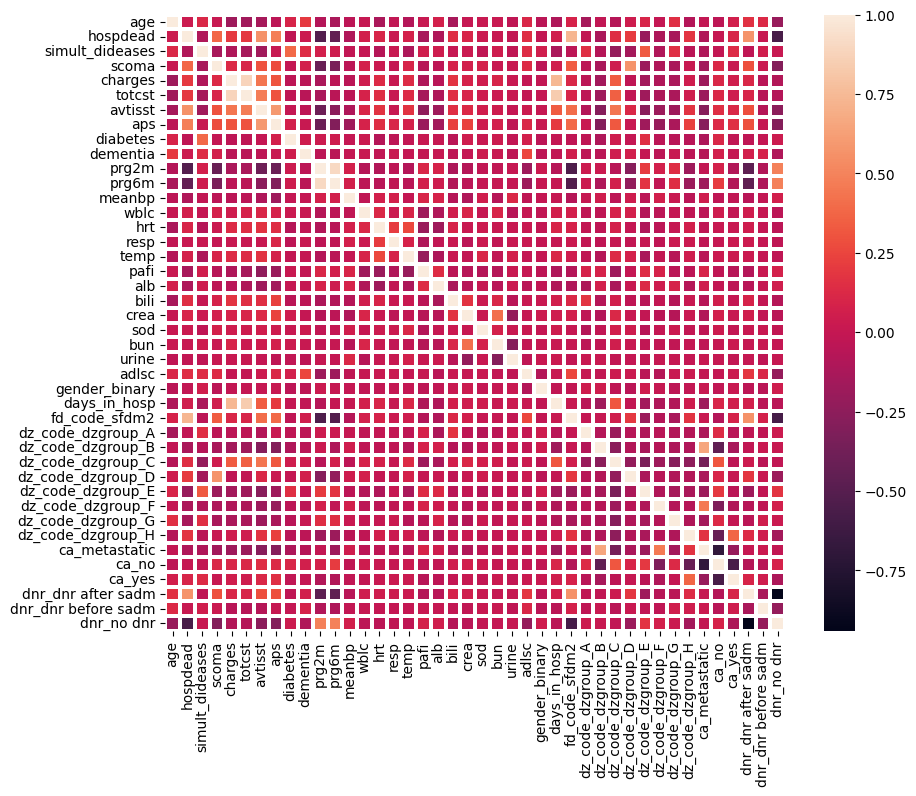

In [46]:
plt.figure(figsize=(10, 8))
sb.heatmap(final_dataset.corr(), linewidths=1.5)
plt.show()

##### According to the correlation matrix there a very few correlations that are noticeable: <br>
- hospdeath has some correlation with fd_code_sfdm2 (functional disability), dnr_dnr_after_sadm (do-not-resuscitate order), aps (day 3 physiology score (no coma, imp bun,uout for ph1)) and avtisst (Therapeutic Intervention Scoring)
- total cost correlates with days in hospital, avtisst and aps
- there is also a colinearity between totcst (total cost) and charges, which makes sense because there is an avg ratio of charges / cost = 1.9

### Drop target columns to which we will be back later

##### 
- avtisst (will be used in cost prediction) - Average TISS score, days 3-25, where Therapeutic Intervention Scoring System (TISS) is a method for calculating costs in the intensive care unit (ICU) and intermediate care unit (IMCU). </br>
- prg2m (will be used in estimate prediction) - Physician’s 2-month survival estimate for patient. </br>
- prg6m (will be used in estimate prediction) - Physician’s 6-month survival estimate for patient.<br>
- fd_code_sfdm2 (will be used in functional disability prediction) <br>
- days_in_hosp (will be used as target for hospital cost prediction) <br>
- hospdead (will be the target for death in hospital prediction)

In [47]:
X = final_dataset.drop(columns=['hospdead','days_in_hosp','fd_code_sfdm2','avtisst','prg2m','prg6m','totcst','charges'])

### First working on functional disability prediction

###### This can be used in patient support and hospital resources planning

In [48]:
y = final_dataset['fd_code_sfdm2']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### This is multiclassification problem, so I would like to try SVM, AdaBoost and RandomForest

##### 1) Starting with SVM

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=100)

In [52]:
svm_classifier = SVC(kernel='linear',random_state=100, C=10)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6713395638629284

###### Using GridSearch for parameters tuning

In [53]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(random_state=100), param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_svm_classifier = grid_search.best_estimator_
y_pred_best = best_svm_classifier.predict(X_test)

Best Parameters: {'C': 1, 'kernel': 'rbf'}


In [54]:
# Applying best parameters
svm_classifier = SVC(kernel='rbf',random_state=100, C=1)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6786085150571132

##### 2) RandomForest

In [55]:
rf_classifier = RandomForestClassifier(random_state=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6827622014537902

###### Using GridSearch again

In [56]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=100), param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_rf_classifier = grid_search.best_estimator_
y_pred_best = best_rf_classifier.predict(X_test)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [57]:
# Applying best parameters
rf_classifier2 = RandomForestClassifier(random_state=100, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
rf_classifier2.fit(X_train, y_train)
y_pred2 = rf_classifier2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
accuracy2

0.6895119418483905

##### 3) AdaBoost

In [58]:
adaboost_classifier = AdaBoostClassifier(random_state=100)
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6786085150571132

##### Best results - RandomForest

### Next step is to predict death in hospital. This will be a binary classification task

##### Updating the dataset by including back functional disability as a feature

In [59]:
final_dataset_update = final_dataset

In [60]:
X = final_dataset_update.drop(columns=['hospdead','days_in_hosp','avtisst','prg2m','prg6m','totcst','charges'])

In [61]:
y = final_dataset_update['hospdead']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

##### Comparing SVM vs RandomForest - the choice would RandomForest. It performs a bit better, and timewise for SVM it took much longer to complete

In [63]:
# RandomForest
rf_classifier = RandomForestClassifier(random_state=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9164070612668743

In [64]:
# SVM
svm_classifier = SVC(kernel='linear',random_state=100, C=10)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9096573208722741

### Now I am moving to the last step - predicting hospital cost. It is a regression task <br>
For that I will need _days in hospital_ and _survival estimate for 2 and 6 months_ included as features. These data can also be predicted, it is a regression problem, but I am skipping these steps for the purpose of this project and taking what is alredy given in this dataset.

Also, I need to include average TISS score (Therapeutic Intervention Scoring System (TISS),) as a predictor. According to the metatdata provided by the Vanderbilt University Department of Biostatistics, this data is used as a method for calculating costs in the intensive care unit (ICU) and intermediate care unit (IMCU)

In [65]:
# Copying df
final_dataset_update_2 = final_dataset

In [66]:
# Dropping missing values
final_dataset_update_2.drop(final_dataset_update_2.loc[final_dataset_update_2['avtisst'].isnull()].index, inplace=True)
final_dataset_update_2.drop(final_dataset_update_2.loc[final_dataset_update_2['totcst'].isnull()].index, inplace=True)
final_dataset_update_2.drop(final_dataset_update_2.loc[final_dataset_update_2['prg2m'].isnull()].index, inplace=True)

In [67]:
final_dataset_update_2.columns

Index(['age', 'hospdead', 'simult_dideases', 'scoma', 'charges', 'totcst',
       'avtisst', 'aps', 'diabetes', 'dementia', 'prg2m', 'prg6m', 'meanbp',
       'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod',
       'bun', 'urine', 'adlsc', 'gender_binary', 'days_in_hosp',
       'fd_code_sfdm2', 'dz_code_dzgroup_A', 'dz_code_dzgroup_B',
       'dz_code_dzgroup_C', 'dz_code_dzgroup_D', 'dz_code_dzgroup_E',
       'dz_code_dzgroup_F', 'dz_code_dzgroup_G', 'dz_code_dzgroup_H',
       'ca_metastatic', 'ca_no', 'ca_yes', 'dnr_dnr after sadm',
       'dnr_dnr before sadm', 'dnr_no dnr'],
      dtype='object')

##### Now I want to remove some columns as I think it's not needed for this task. When I look at the correlation matrix, there are very few features that show sign of correlation to the target (totcst), so I will keep those in the model.

In [68]:
subset_for_training = final_dataset_update_2[['avtisst', 'aps', 'adlsc', 'days_in_hosp', 'fd_code_sfdm2','totcst']]

In [69]:
subset_for_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5706 entries, 14 to 9098
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avtisst        5706 non-null   float64
 1   aps            5706 non-null   float64
 2   adlsc          5706 non-null   float64
 3   days_in_hosp   5706 non-null   int64  
 4   fd_code_sfdm2  5706 non-null   int64  
 5   totcst         5706 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 312.0 KB


In [70]:
subset_for_training.describe()

,avtisst,aps,adlsc,days_in_hosp,fd_code_sfdm2,totcst
count,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000,5706.000000
mean,23.062564,38.309499,1.874040,21.812478,2.868559,30615.673728
std,13.475702,19.409086,2.100335,24.168222,1.809383,44526.146963
min,1.000000,0.000000,0.000000,4.000000,1.000000,39.496000
25%,12.000000,24.000000,0.000000,9.000000,1.000000,6400.443325
50%,20.000000,35.000000,1.000000,14.000000,2.000000,15374.144500
75%,32.500000,49.000000,3.000000,25.000000,5.000000,36075.968750
max,83.000000,143.000000,7.073242,339.000000,5.000000,633212.000000


##### A pairplot is very helpful

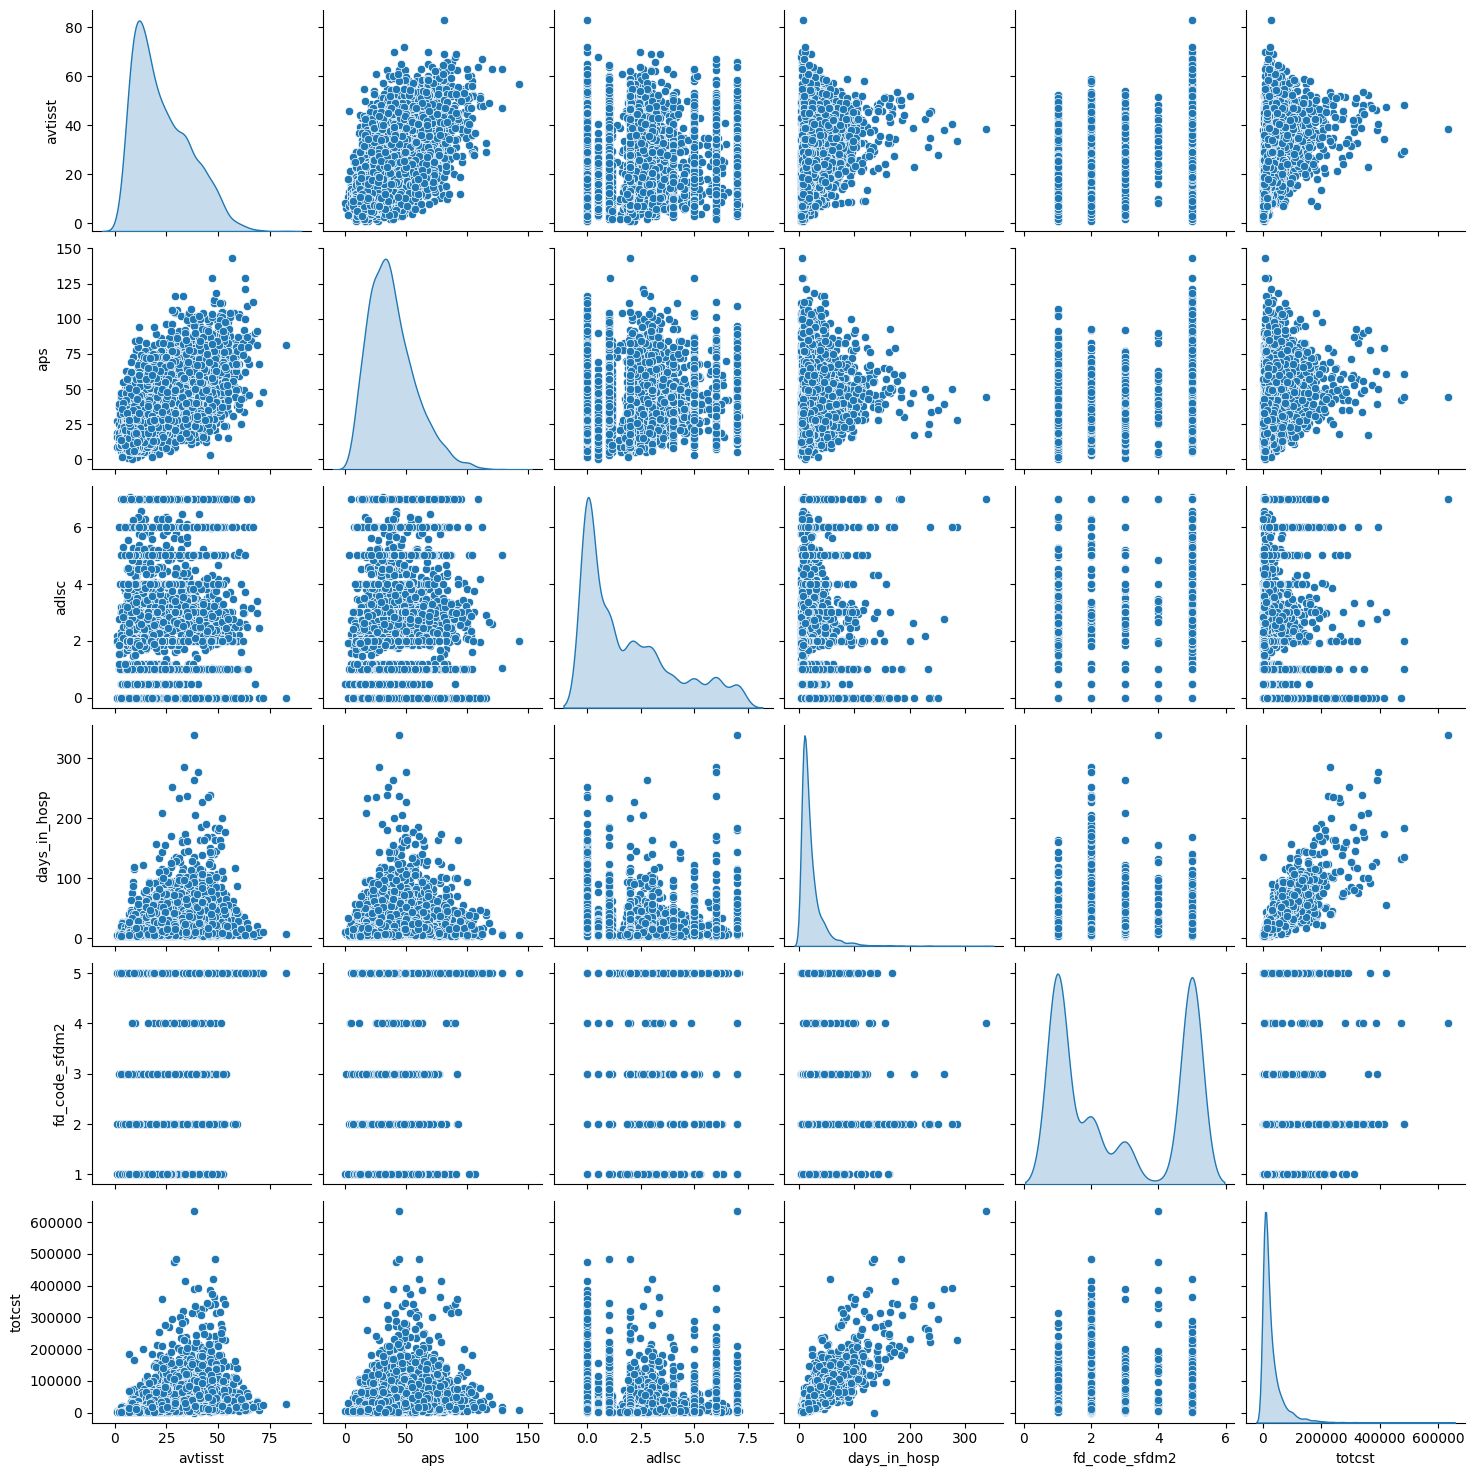

In [71]:
sb.pairplot(subset_for_training,diag_kind='kde')

##### It seems like there is linear relationships between days_in_hosp and totcst, but the variance is not consistent. I also think that avtisst and aps variables have sort of normal destribution. By looking at the plot avtisst vs aps it shows some linear pattern, so I would say there is colinearity, hence one of them may be redundant. In order to find out I am going to experiment with all of them in my models.

##### One more thing to highlight is quite a few outliers in totcst - by looking at the graph in the right bottom corner I see long tail on the right side (a few large values)

In [72]:
subset_for_training['totcst'].describe()

count      5706.000000
mean      30615.673728
std       44526.146963
min          39.496000
25%        6400.443325
50%       15374.144500
75%       36075.968750
max      633212.000000
Name: totcst, dtype: float64

In [73]:
subset_for_training[subset_for_training['totcst']>400000]

,avtisst,aps,adlsc,days_in_hosp,fd_code_sfdm2,totcst
196,38.50,44.0,7.0,339,4,633212.00
203,28.50,42.0,0.0,132,4,473212.25
307,47.50,61.0,3.0,55,5,421848.50
655,29.50,61.0,2.0,136,2,483556.25
4636,48.50,44.0,1.0,184,2,483192.50
4881,34.25,79.0,0.0,174,2,412953.00


##### I want to start with linear regression to see if the model captures linear relationships between the totcst and days_in_hosp. Most likely it will not do well due to high variance and non-linear relationships with all other variables. But I want to try and prove that it's not the best choice.

In [74]:
X_ols = subset_for_training.drop(columns=['totcst'])
y_ols = subset_for_training['totcst']

In [75]:
model_ols = smf.ols(formula='totcst~avtisst+aps+adlsc+days_in_hosp+fd_code_sfdm2', data=subset_for_training).fit()

In [76]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 totcst   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     3590.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:03:50   Log-Likelihood:                -65113.
No. Observations:                5706   AIC:                         1.302e+05
Df Residuals:                    5700   BIC:                         1.303e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.664e+04    733.718    -22.685      0.000   -1.81e+04   -1.52e+04
avtisst         611.9931     29.006     21.099      0.000     555.131     668.855
aps              70.4064     18.811      3.743      0.000      33.529     107.283
adlsc          -787.6004    143.191     -5.500      0.000   -1068.310    -506.891
days_in_hosp   1432.2057     12.944    110.648      0.000    1406.831    1457.581
fd_code_sfdm2   238.6948    185.586      1.286      0.198    -125.124     602.513
==============================================================================
Omnibus:                     4835.791   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           392803.415
Skew:                           3.587   Prob(JB):                         0.00
Kurtosis:                      43.009   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The p-values in the summary indicates that fd_code_sfdm2 predictor is not statistically significant. By rmoving it from the model I didn't get any improvement. Also, it didn't pick up colinearity between avtisst and aps.

##### In general, it's not too bad - 0.759 R-squared, but when looking at predicted cost, there are many negative values, which doesn't make sense. Because there is high variability and non-linear relationships between the target and all predictors (except days_in_hosp), it is expected that the linear regression will not do well.

##### I had tried removing outliers but it does not improve the overall result, the adj R^2 is still about the same - 0.758. 

In [77]:
#subset_for_training.drop(subset_for_training.loc[subset_for_training['totcst']>400000].index, inplace=True)

##### Here is result - over 500 values are negative. This is unacceptable in cost planning.

In [104]:
y_pred = model_ols.predict(X_ols)

In [111]:
df_test_l = pd.DataFrame(y_pred)
df_test_l[df_test_l[0]<0]

,0
25,-2075.976317
36,-5452.735806
39,-4859.955140
71,-8632.537727
77,-4190.364261
...,...
9070,-6900.396709
9078,-3466.910377
9079,-1369.935420
9086,-4959.138370


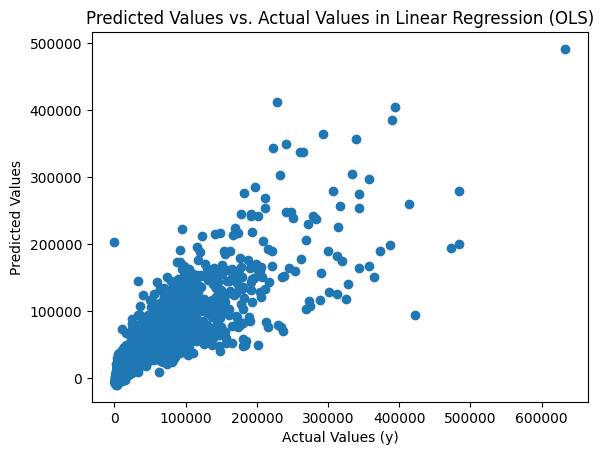

In [81]:
plt.scatter(y_ols, y_pred)
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values')
plt.title('Predicted Values vs. Actual Values in Linear Regression (OLS)')
plt.show()

##### This graph shows that predicted vs actual values are all over the place, which does not indicate a good fit.

##### Next option that I want to try is RandomForest Regressor

In [112]:
rfr = RandomForestRegressor(random_state=100)
rfr.fit(X_ols,y_ols)
y_pred = rfr.predict(X_ols)
r_squared = r2_score(y_ols, y_pred)
r_squared

0.9640481062138171

In [114]:
df_4 = pd.DataFrame(y_pred)
df_4[df_4[0]<0]

,0


##### No negative values predicted

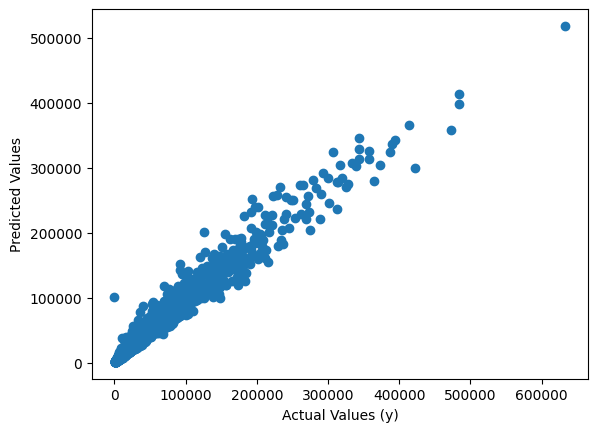

In [115]:
plt.scatter(y_ols, y_pred)
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values')
plt.show()

##### The plot looks much better, it is forming a straight line which indicates a good fit.

### Conclusion:
In this project I worked with a dataset of a controlled trial conducted to improve care for seriously ill hospitalized patients. I tried to predict: <br>
- severity of functional disability (this includes coma) - this could be used in 2-month and 6-month survival estimate and days in hospital, which further would help with allocating  hospital resources, defining treatment and providing a better support to patients <br>
- death in horpital - for hospital resources planning as well <br>
- hospital cost per patient <br>

When working on hospdeath and totcst prediction, I was able to achieve a good performance by using Random Forest. And for all the three tasks seems like Random Forest was choice #1 in terms of preformance and time compexity.

Regarding the first item - the max accuarcy that I could get was 0.7, and there are a few things that I would want to highlight - having  a medical advice on blood test results to better understand outliers, or having some guidance on patient evaluation processes would possibly help improve the approach, hence the outcomes. With no SME support it is very challenging to make assumptions. However, it was helpful for educational purposes, to practice on models evaluation and parameters tuning. Undestanding data and selecting appropiate algorithms is very important in achieving good results.

**please acknowledge https://pubmed.ncbi.nlm.nih.gov/7474243/** <br> 
**Citation**:  _"To improve the experience of seriously ill and dying patients, greater individual and societal commitment and more proactive and forceful measured may be needed"_.

My GitHub repository: <br>
https://github.com/INtilakGH/ML-Supervised-Learning-Final-Project